<a href="https://colab.research.google.com/github/adriellysh/ciencia-de-dados/blob/main/Projeto_Final_com_Machine_Learning_Deep_Learning_Adri%C3%A9lly_de_Souza_Homem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [235]:
!pip install tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [3]:
data = pd.read_csv('bank_transactions.csv')

In [124]:
print("Shape of the dataset:", data.shape)
display(data.head())

print("\nDataset Information:")
print(data.info())

print("\nStatistical Summary:")
display(data.describe().T)

Shape of the dataset: (2512, 18)


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeDiff,FraudLabel
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,1,36,D000380,162.198.218.92,14,0,70,0,81,1,5112.21,2024-11-04 08:08:08,49477134.0,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,1,15,D000051,13.149.61.4,51,0,68,0,141,1,13758.91,2024-11-04 08:09:35,42823516.0,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,1,23,D000235,215.97.143.157,8,2,19,3,56,1,1122.35,2024-11-04 08:07:04,41694656.0,0
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,1,33,D000187,200.13.225.150,1,2,26,3,25,1,8569.06,2024-11-04 08:09:06,47403415.0,0
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,0,1,D000308,65.164.3.100,90,2,26,3,198,1,7429.40,2024-11-04 08:06:39,33228915.0,0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   int64         
 5   Location                 2512 non-null   int64         
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   int64         
 9   Channel                  2512 non-null   int64         
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   int64         
 12  TransactionD

,count,mean,min,25%,50%,75%,max,std
TransactionAmount,2512.0,297.593778,0.26,81.885,211.14,414.5275,1919.11,291.946243
TransactionDate,2512,2023-07-05 20:32:10.826433024,2023-01-02 16:00:06,2023-04-03 16:22:05.750000128,2023-07-07 17:49:43.500000,2023-10-06 18:40:53.500000,2024-01-01 18:21:50,NaN
TransactionType,2512.0,0.773885,0.0,1.0,1.0,1.0,1.0,0.418398
Location,2512.0,21.032643,0.0,11.0,21.0,31.0,42.0,12.253549
MerchantID,2512.0,48.523885,0.0,24.0,48.0,73.0,99.0,29.03247
Channel,2512.0,0.991242,0.0,0.0,1.0,2.0,2.0,0.8091
CustomerAge,2512.0,44.673965,18.0,27.0,45.0,59.0,80.0,17.792198
CustomerOccupation,2512.0,1.51035,0.0,0.0,1.5,3.0,3.0,1.129548
TransactionDuration,2512.0,119.643312,10.0,63.0,112.5,161.0,300.0,69.963757
LoginAttempts,2512.0,1.124602,1.0,1.0,1.0,1.0,5.0,0.602662


# Análise se é fraude ou não - Random Forest

In [333]:
data['FraudLabel'] = np.random.choice([0, 1], size=len(data), p=[0.8, 0.2])

In [71]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['PreviousTransactionDate'] = pd.to_datetime(data['PreviousTransactionDate'])

In [334]:
data['TimeDiff'] = (data['TransactionDate'] - data['PreviousTransactionDate']).dt.total_seconds().abs()

In [335]:
label_encoder = LabelEncoder()
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'MerchantID']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [336]:
features = ['TransactionAmount', 'TransactionType', 'Channel', 'CustomerAge', 'TransactionDuration',
            'LoginAttempts', 'AccountBalance', 'TimeDiff']
X = data[features]
y = data['FraudLabel']

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [338]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [339]:
y_pred = model.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.8063660477453581
Matriz de Confusão:
 [[607   5]
 [141   1]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89       612
           1       0.17      0.01      0.01       142

    accuracy                           0.81       754
   macro avg       0.49      0.50      0.45       754
weighted avg       0.69      0.81      0.73       754



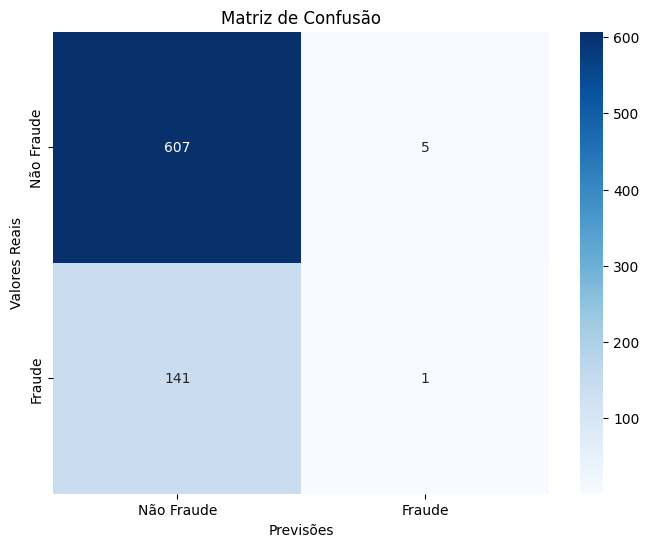

In [455]:
labels = ['Não Fraude', 'Fraude']

confusao = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusao, annot=True, fmt="d", cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()

# Frequência de fraudes por localização

In [355]:
# Contar o número total de transações por localização
total_by_location = data.groupby('Location').size()
print(total_by_location)

Location
0     41
1     61
2     59
3     51
4     61
5     68
6     60
7     60
8     54
9     49
10    62
11    63
12    46
13    70
14    60
15    63
16    58
17    60
18    61
19    55
20    69
21    51
22    63
23    61
24    64
25    55
26    55
27    58
28    68
29    65
30    67
31    55
32    42
33    59
34    53
35    59
36    59
37    57
38    59
39    61
40    67
41    55
42    48
dtype: int64


In [356]:
# Calcular a frequência de fraudes (fraudes / total de transações)
fraud_frequency = fraud_by_location / total_by_location
print(fraud_frequency)

Location
0     0.219512
1     0.147541
2     0.135593
3     0.156863
4     0.196721
5     0.147059
6     0.266667
7     0.183333
8     0.259259
9     0.183673
10    0.161290
11    0.222222
12    0.195652
13    0.185714
14    0.183333
15    0.158730
16    0.155172
17    0.216667
18    0.163934
19    0.181818
20    0.217391
21    0.215686
22    0.238095
23    0.081967
24    0.218750
25    0.127273
26    0.145455
27    0.224138
28    0.161765
29    0.184615
30    0.253731
31    0.218182
32    0.309524
33    0.254237
34    0.207547
35    0.237288
36    0.203390
37    0.333333
38    0.169492
39    0.147541
40    0.253731
41    0.145455
42    0.104167
dtype: float64


In [357]:
fraud_frequency_sorted = fraud_frequency.sort_values(ascending=False)

<ipython-input-358-783e437c9ed9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_frequency_sorted.index, y=fraud_frequency_sorted.values, palette='Blues')


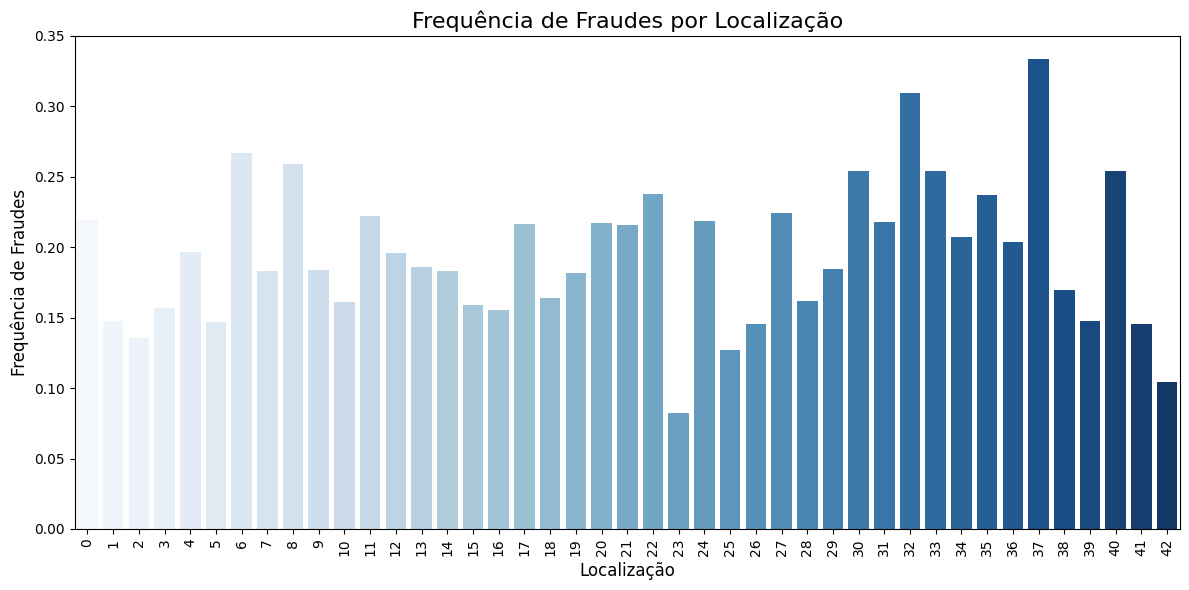

In [358]:
plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_frequency_sorted.index, y=fraud_frequency_sorted.values, palette='Blues')
plt.title('Frequência de Fraudes por Localização', fontsize=16)
plt.xlabel('Localização', fontsize=12)
plt.ylabel('Frequência de Fraudes', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [352]:
# Fraudes por dia
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

fraud_by_day = data.groupby(data['TransactionDate'].dt.date)['FraudLabel'].sum()
total_by_day = data.groupby(data['TransactionDate'].dt.date).size()

fraud_frequency_by_day = fraud_by_day / total_by_day
print(fraud_frequency_by_day)

TransactionDate
2023-01-02    0.157895
2023-01-03    0.222222
2023-01-04    0.000000
2023-01-05    0.250000
2023-01-06    0.428571
                ...   
2023-12-26    0.000000
2023-12-27    0.000000
2023-12-28    0.428571
2023-12-29    0.111111
2024-01-01    0.153846
Length: 261, dtype: float64


# Análise se é fraude ou não - Redes Neurais

In [189]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [465]:
# Construção do modelo de rede neural
modelo = Sequential() # cria uma rede neural com modelo sequencial de camadas
modelo.add(Dense(1500, input_dim=X_train_scaled.shape[1], activation='relu'))
modelo.add(Dense(570, activation='relu'))
modelo.add(Dense(240, activation='relu'))
modelo.add(Dense(120, activation='relu'))
modelo.add(Dense(40, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [466]:
modelo.summary() # Resumo da arquitetura da rede neural

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_161 (Dense)                    │ (None, 1500)                │          13,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_162 (Dense)                    │ (None, 570)                 │         855,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_163 (Dense)                    │ (None, 240)                 │         137,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_164 (Dense)                    │ (None, 120)                 │          28,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_165 (Dense)                    │ (None, 40)                  │           4,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_166 (Dense)                    │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,039,911 (3.97 MB)

 Trainable params: 1,039,911 (3.97 MB)

 Non-trainable params: 0 (0.00 B)

In [467]:
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [468]:
# Treinando o modelo de Rede Neural
history = modelo.fit(X_train_scaled, y_train, epochs=30, validation_data=(X_test_scaled, y_test))

Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8056 - loss: 0.5450 - val_accuracy: 0.8117 - val_loss: 0.4909
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7957 - loss: 0.5144 - val_accuracy: 0.8117 - val_loss: 0.4996
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7911 - loss: 0.5111 - val_accuracy: 0.8117 - val_loss: 0.4946
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8093 - loss: 0.4877 - val_accuracy: 0.8117 - val_loss: 0.4859
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8047 - loss: 0.4995 - val_accuracy: 0.8117 - val_loss: 0.4919
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7999 - loss: 0.4976 - val_accuracy: 0.8117 - val_loss: 0.4996
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8071 - loss: 0.4824 - val_accuracy: 0.8117 - val_loss: 0.4966
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8020 - loss: 0.4855 - val_accuracy: 0.8117 - v

In [469]:
# Avaliar o modelo nos dados de teste
y_pred_nn = (modelo.predict(X_test_scaled) > 0.5).astype(int)
print("Acurácia Redes Neurais:", accuracy_score(y_test, y_pred_nn))
print("Matriz de Confusão Redes Neurais:\n", confusion_matrix(y_test, y_pred_nn))
print("Relatório de Classificação Redes Neurais:\n", classification_report(y_test, y_pred_nn))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Acurácia Redes Neurais: 0.7718832891246684
Matriz de Confusão Redes Neurais:
 [[575  37]
 [135   7]]
Relatório de Classificação Redes Neurais:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       612
           1       0.16      0.05      0.08       142

    accuracy                           0.77       754
   macro avg       0.48      0.49      0.47       754
weighted avg       0.69      0.77      0.72       754



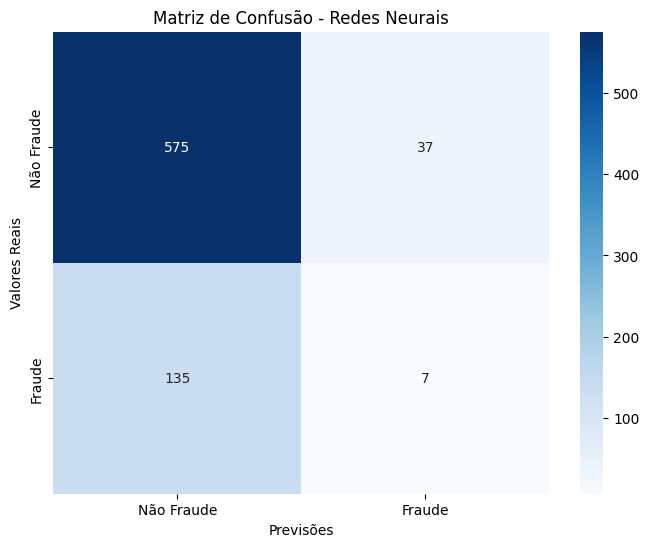

In [470]:
# Plotando a Matriz de Confusão da Rede Neural
confusao_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(confusao_nn, annot=True, fmt="d", cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão - Redes Neurais')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()

In [471]:
# Plotando a perda e acurácia durante o treinamento
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

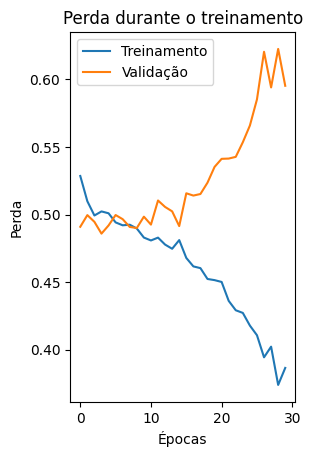

In [474]:
# Perda de treinamento
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

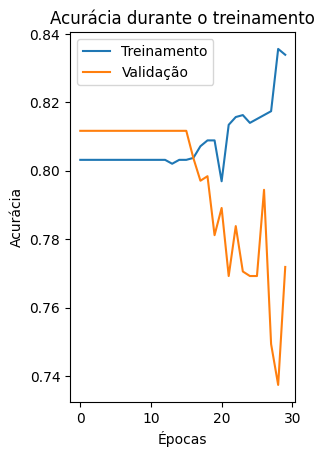

In [475]:
# Acurácia de treinamento
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()